## 3.4 サポートベクターマシンによる最大マージン分類

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [22]:
""" iris dataset の用意 """
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0
)

sc = StandardScaler()

#　トレーニングデータの平均と標準偏差を計算

sc.fit(X_train)

# 平均、標準偏差を用いて標準化

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

""" トレーニングデータとテストデータの特徴量を行方向に結合
"""
X_combined_std = np.vstack((X_train_std, X_test_std))

""" トレーニングデータとテストデータのクラスラベルの結合
"""
y_combined = np.hstack((y_train, y_test))


In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_reqions(X, y, classifier, test_idx=None, resolusion=0.02):
    
    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1 , X[:, 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolusion),
        np.arange(x2_min, x2_max, resolusion)
    )
    
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contour(xx1, xx2, z, alpha=0.4, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    
    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl
        )
    # テストサンプルを目立たせる
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(
            x=X_test[:, 0], 
            y=X_test[:, 1], 
            c="gray", alpha=1.0, 
            linewidths=.1, marker='.', s=55, label='test set'
        )

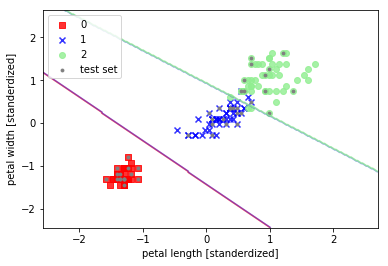

In [27]:
from sklearn.svm import SVC

""" 線形SVMのインスタンス """
svm = SVC(kernel="linear", C=1.0, random_state=0)

""" トレーニングデータの適合 """
svm.fit(X_train_std, y_train)

plot_decision_reqions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("petal length [standerdized]")
plt.ylabel("petal width [standerdized]")
plt.legend(loc='upper left')
plt.show()

In [29]:
from sklearn.linear_model import SGDClassifier

""" 確率的勾配降下法バージョンのパーセプトロンを生成 """
ppn = SGDClassifier(loss="perceptron")

""" 確率的勾配降下法バージョンのロジスティック回帰を生成 """
lr = SGDClassifier(loss="log")

""" 確率的勾配降下法バージョンのSVN(損失関数＝ヒンジ関数)を生成 """
svm = SGDClassifier(loss="hinge")

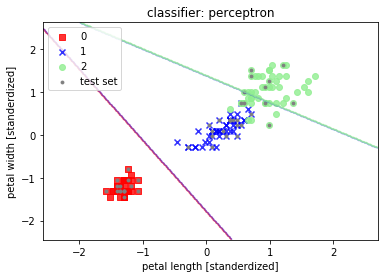

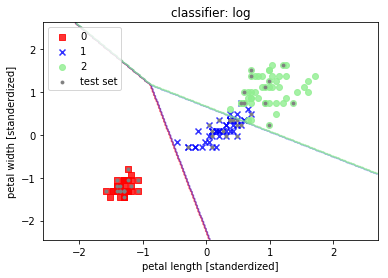

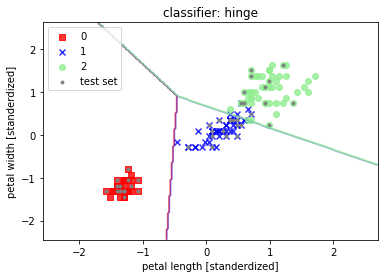

In [49]:
for _model in [ppn, lr, svm]:
    """ トレーニングデータの適合 """
    _model.set_params(max_iter=100)
    _model.fit(X_train_std, y_train)

    plot_decision_reqions(X_combined_std, y_combined, classifier=_model, test_idx=range(105, 150))
    plt.title("classifier: %s" % _model.loss)
    plt.xlabel("petal length [standerdized]")
    plt.ylabel("petal width [standerdized]")
    plt.legend(loc='upper left')
    plt.show()